# Wheatstonov most
### Gregor Kržmanc, 6. 5. 2021
## 1. UVOD
Po električnem prevodniku, na katerega je pritisnjena enosmerna napetost U, teče tok I. Velja $ U/I = konst. = R$, sorazm. koef. je upornost. Upor R je odvisen od velikosti in oblike upornika in od snovi. Če imamo upornik s konst. presekom, velja $$ R = \frac{\zeta l}{S} $$. Upornost neznanega vodnika lahko natančno izmerimo z Wheatstonovim mostom:

Imamo znani upornik $R_0$ in galvanometer, s katerim lahko izmerimo, ali je električni tok enak 0. Na vir napetosti vežemo zaporedna upora $R_x $ (tega iščemo) in $R_0$, hkrati pa vežemo na vir napetosti tudi žico znane dolžine. Tok merimo med poljubno točko na žici in med obema zapor. uporoma. Pri neki točki na žici je tok enak 0, kar pomeni, da velja $$ R_x = R_0 \frac{a}{l-a}$$, če a merimo od tistega konca žice, ki je povezan direktno z $R_x$, l je pa dolžina žice.
## 2. NAVODILO
Izmeriti upor danega neznanega upornika in neznane žice. Izračunati specifični upor žice.
## 3. MERIVE IN REZULTATI
### Neznani upornik $R_x$
$$R_0 = 3000 \Omega $$
$$ a = 61.1 cm \pm 4 mm  $$ 
$$ b = 38.5 cm \pm 4 mm $$


In [3]:
from uncertainties import ufloat
from numpy import pi
 
R_0 = 3000 # ohm
a = ufloat(61.1, 0.4)
b = ufloat(38.5, 0.4)
l = 100
R_x = R_0 * a / (l - a)
R_x_1 = R_0 * (l - b) / b

In [4]:
print('R_x=', 0.5*(R_x+R_x_1), 'ohm') # povprečje obeh meritev (z a in b)

R_x= (4.75+/-0.06)e+03 ohm


### Neznana žica - $R_ž$, $\zeta_ž$
$$ R_0 = 10 \Omega $$
$$ a = 36.6 cm \pm 4 mm  $$
$$ b = 62.5 cm \pm 4 mm $$ 
$$ 2r = 0.5 mm $$
$$ l = 104 cm \pm 1 cm $$
$$ \zeta_ž = R_ž \cdot S/l $$


In [9]:
R_0 = 10
a = ufloat(36.6, 0.4)
b = ufloat(62.5, 0.4)

# žica
r = 0.5e-3 / 2
l_ž = ufloat(104, 1) * 1e-2
R_ž = R_0 * a / (l-a)
R_ž_1 = R_0 * (l - b)/ b
R_ž_avg = 0.5 * (R_ž_1 + R_ž)
S = pi * r * r

r_ž = S * R_ž / l_ž
r_ž_1 = S* R_ž_1 / l_ž
r_ž_avg = 0.5 * (r_ž_1 + r_ž)

In [10]:
print('R_ž=', R_ž_avg, "Ω")
print('ζ_ž=', r_ž_avg,'Ωm')

R_ž= 5.89+/-0.07 Ω
ζ_ž= (1.111+/-0.017)e-06 Ωm


Izmerjena vrednost se dobro ujema z vrednostjo za nikromsko žico $1.1 \cdot 10^{-6} \Omega m$, navedeno na Wikipediji ([vir](https://en.wikipedia.org/wiki/Electrical_resistivity_and_conductivity)).
## Vpliv upornosti upornikov na napako
$$R_x = R_0 \frac{a}{l-a} $$
$$\ln{R_x} = \ln{R_0} + \ln{\frac{a}{l-a}}$$
$$\frac{dR_x}{R_x} = \frac{l \cdot da}{a(l-a)}$$
Funkcija ima pol pri a=0 in a=l, torej na koncih žice. Najbolj se splača meriti čim bolj na sredini.

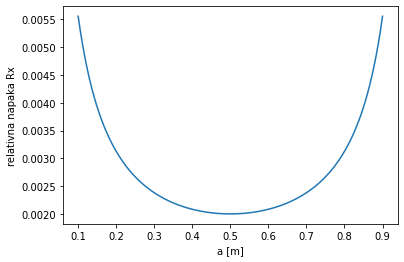

In [29]:
import numpy as np
import matplotlib.pyplot as plt
da = 0.5e-3
l = 1
_x = np.linspace(0.1, 0.9, 1000)
plt.xlabel('a [m]')
plt.ylabel('relativna napaka Rx')
plt.plot(_x, l * da / _x / (l-_x))
plt.show()